# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | alta floresta
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | uige
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | kwaluseni
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | soe
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | savyntsi
Processing

Processing Record 34 of Set 4 | sesheke
Processing Record 35 of Set 4 | zhenjiang
Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | imbituba
Processing Record 38 of Set 4 | tanout
Processing Record 39 of Set 4 | garowe
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | komatipoort
Processing Record 42 of Set 4 | russell
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | poum
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | viransehir
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | kasongo
Processing Record 49 of Set 4 | zatyshshya
Processing Record 0 of Set 5 | newton
Processing Record 1 of Set 5 | atasu
Processing Record 2 of Set 5 | aldan
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | saryozek
Processing Record

Processing Record 21 of Set 8 | panaba
Processing Record 22 of Set 8 | ostrovnoy
Processing Record 23 of Set 8 | port keats
Processing Record 24 of Set 8 | ust-ordynskiy
Processing Record 25 of Set 8 | gat
Processing Record 26 of Set 8 | saldanha
Processing Record 27 of Set 8 | wilmington
Processing Record 28 of Set 8 | guilin
Processing Record 29 of Set 8 | ahumada
City not found. Skipping...
Processing Record 30 of Set 8 | normandin
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | pocoes
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | gambiran
Processing Record 35 of Set 8 | fountain hills
Processing Record 36 of Set 8 | tambun
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | bartica
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | rampura
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | camapua
Processing Record 43 of Set 8 | dagohoy
Processing Record 44 of Set 8 | t

Processing Record 9 of Set 12 | arraial do cabo
Processing Record 10 of Set 12 | lodingen
Processing Record 11 of Set 12 | shu
Processing Record 12 of Set 12 | coutances
Processing Record 13 of Set 12 | leningradskaya
Processing Record 14 of Set 12 | taganak
Processing Record 15 of Set 12 | kenai
Processing Record 16 of Set 12 | mayahi
Processing Record 17 of Set 12 | warrnambool
Processing Record 18 of Set 12 | eureka
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | port hedland
Processing Record 21 of Set 12 | thyboron
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | matamoros
Processing Record 24 of Set 12 | la macarena
Processing Record 25 of Set 12 | santo augusto
Processing Record 26 of Set 12 | cayenne
Processing Record 27 of Set 12 | ailigandi
Processing Record 28 of Set 12 | altay
Processing Record 29 of Set 12 | san carlos de bariloche
Processing Record 30 of Set 12 | svetlaya
Processing Record 31 of Set 12 | le port
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-33.42,99,100,0.82,RU,1675831604
1,alta floresta,-9.8756,-56.0861,21.66,97,97,0.70,BR,1675831904
2,chuy,-33.6971,-53.4616,20.09,86,12,2.73,UY,1675831904
3,albany,42.6001,-73.9662,2.35,78,84,1.67,US,1675831653
4,tasiilaq,65.6145,-37.6368,-17.91,46,0,8.49,GL,1675831905


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-33.42,99,100,0.82,RU,1675831604
1,alta floresta,-9.8756,-56.0861,21.66,97,97,0.70,BR,1675831904
2,chuy,-33.6971,-53.4616,20.09,86,12,2.73,UY,1675831904
3,albany,42.6001,-73.9662,2.35,78,84,1.67,US,1675831653
4,tasiilaq,65.6145,-37.6368,-17.91,46,0,8.49,GL,1675831905


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

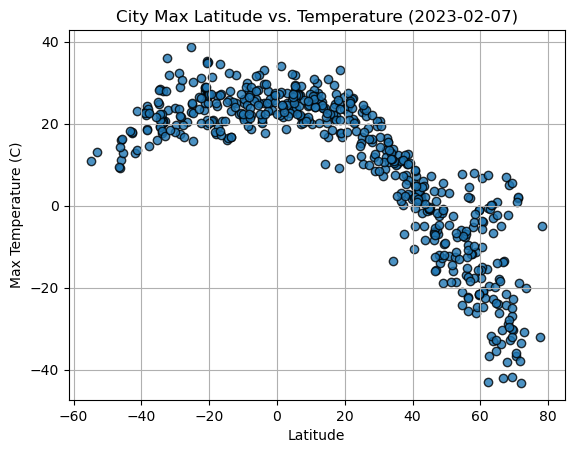

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

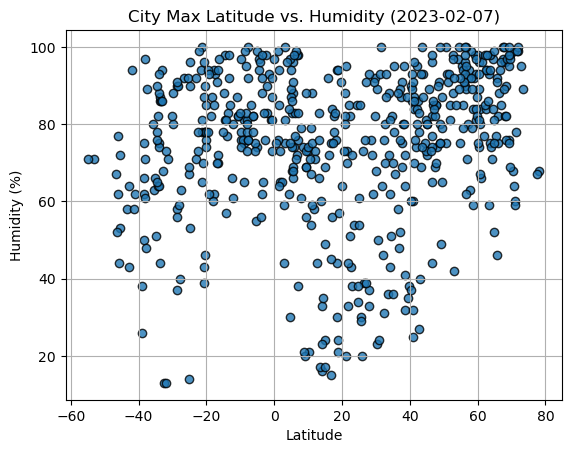

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

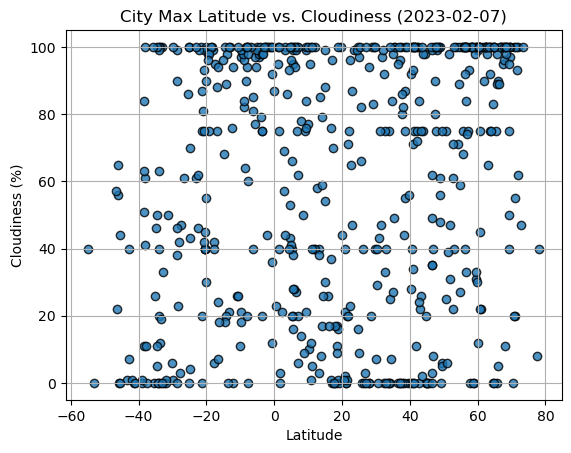

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

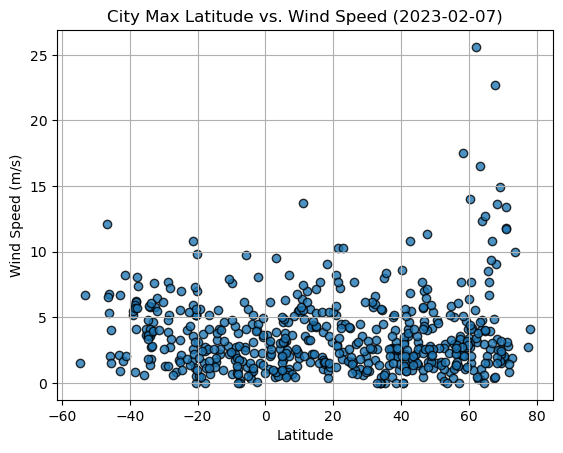

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df ["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-33.42,99,100,0.82,RU,1675831604
3,albany,42.6001,-73.9662,2.35,78,84,1.67,US,1675831653
4,tasiilaq,65.6145,-37.6368,-17.91,46,0,8.49,GL,1675831905
6,ribeira grande,38.5167,-28.7000,12.65,64,55,3.13,PT,1675831905
10,cabo san lucas,22.8909,-109.9124,20.28,38,87,2.38,MX,1675831907


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df ["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,alta floresta,-9.8756,-56.0861,21.66,97,97,0.70,BR,1675831904
2,chuy,-33.6971,-53.4616,20.09,86,12,2.73,UY,1675831904
5,rikitea,-23.1203,-134.9692,26.48,71,61,4.02,PF,1675831662
7,avarua,-21.2078,-159.7750,28.03,78,20,3.60,CK,1675831906
8,cape town,-33.9258,18.4232,21.06,75,20,5.81,ZA,1675831906


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7968631166403691


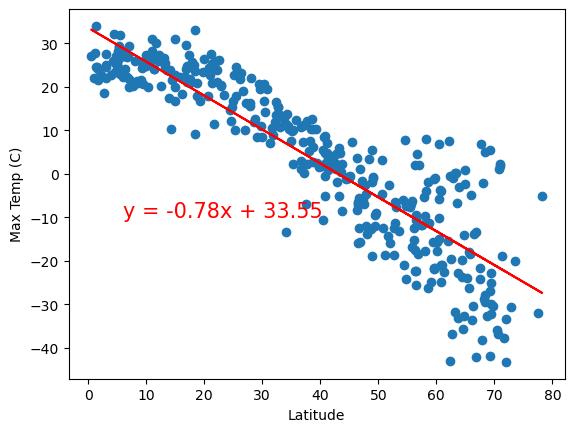

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.18059379933206116


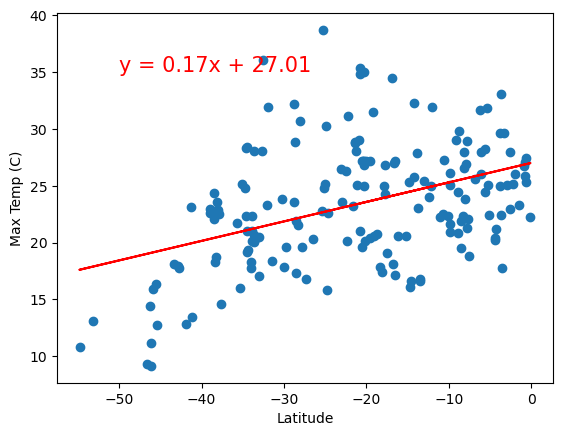

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The North and South Hemispheres have opposing relationships with the Max Temp and the increase in Latitude. For the Northern Hemisphere, the higher the Latitude the lower the Max Temp showing a negative linear relationship, and for the Southern Hemisphere, the higher the Latitude the higher the Max Temp showing a positive linear relationship. The Northern Hemisphere has a stronger relative linear relationship than the Southern Hemisphere. This tells us that the Max Temp is higher the closer you get to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11512323480276944


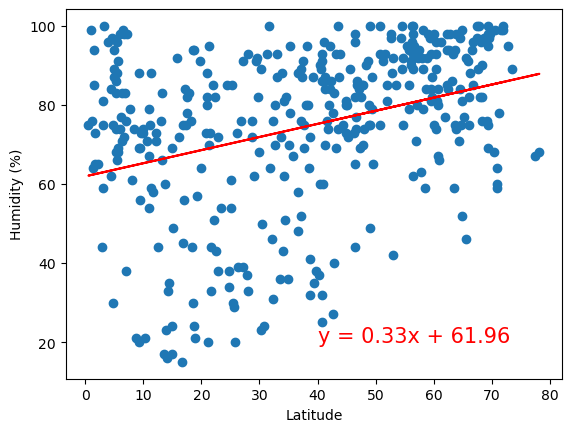

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.14726327001018452


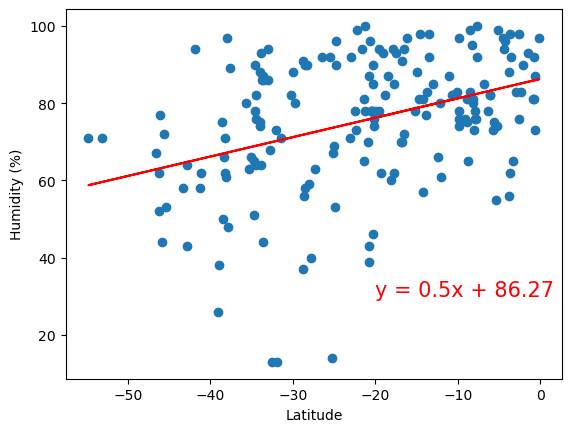

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere, we can see that the higher the Latitude, the higher the Humidity level, showing that for at least Humidity, it doesn't get stronger the closer you get to the equator. Both hemispheres have a fairly weak positive linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.044833785444807824


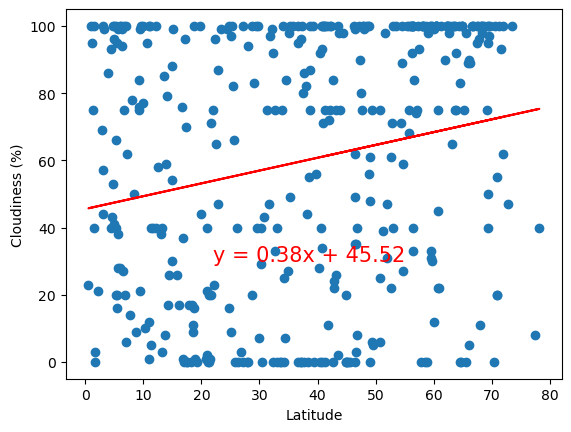

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.2090086574366105


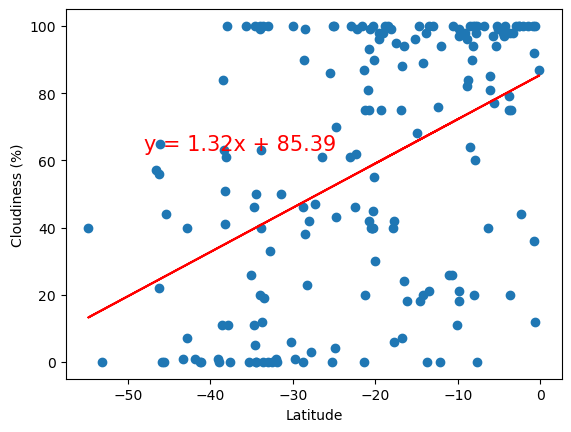

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-48,63),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** When comparing the Cloudiness levels in the Northern and Southern Hemisphere, both have a positive linear relationship (with the Southern Hemisphere having a stronger linear relationship), as shown when there is an increase in Latitude, the Cloudiness also increases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017017801923957975


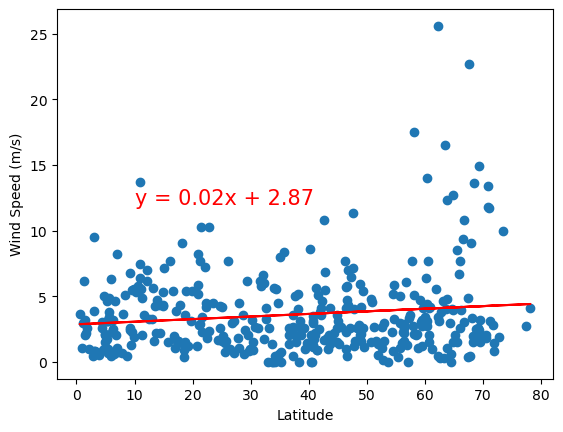

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08407386020503817


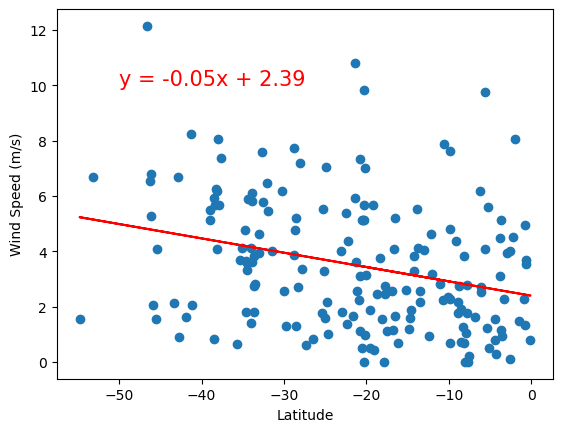

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relationship for the Northern Hemisphere and Southern Hemisphere when comparing Latitude and Wind Speed are both fairly weak linear relationship. The North shows a minimal positive linear relationship as the Latitude increases the wind speed does slightly as well, and the South shows a slightly stronger negative linear relationship, where as the Latitude gets higher, the wind speed slows down. This tells us that near the equator, wind speeds tend to be at their slowest. 